## IBM HR Analytics ##

**Jupyter Notebook to explore the co-efficients that have the most effect on the marital status of Divorce**

As always, I try to start of with my import statements. Note the use of %matplotlib inline so that Jupyter notebooks can show any matplotlib graphs. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

**Importing the IBM HR csv. and turning it into a dataframe**

In [64]:
pd.read_csv('HR-Em.csv').head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df = pd.read_csv('HR-Em.csv')

## "Very" Preliminary EDA ##

Conduct some very preliminary EDA to understand what to expect from the data, ie. how many columns are there going to be, are there any blank data or cells that need to be reviewed. We are lucky that in this data set we do not have any missing fields. 

In [5]:
df.shape

(1470, 35)

In [65]:
df.isnull().sum().head()

Age                 0
Attrition           0
DailyRate           0
Department          0
DistanceFromHome    0
dtype: int64

**Note:** I know that there are no missing data pieces. I'm just using .head() for brevity.

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Some Initial Questions ##

1. Does the amount of business travel have a correlation to marital status? 

2. Does the number of years with a specific manager have a correlation to an employee's last promotion? 

## Initial EDA  and using get_dummies on categorical data##

In [8]:
df = pd.get_dummies(df, columns=['MaritalStatus'])

In [9]:
df = pd.get_dummies(df, columns=['BusinessTravel'])

In [62]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,dept_Human Resources,dept_Research & Development,dept_Sales
0,41,Yes,1102,Sales,1,2,Life Sciences,1,1,2,...,0,0,0,0,0,1,0,0,0,1
1,49,No,279,Research & Development,8,1,Life Sciences,1,2,3,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,1373,Research & Development,2,2,Other,1,4,4,...,1,0,0,0,0,0,0,0,1,0
3,33,No,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,0,0,0,1,0,0,0,1,0
4,27,No,591,Research & Development,2,1,Medical,1,7,1,...,1,0,0,0,0,0,0,0,1,0


In [69]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       '18_Y', 'sex_Female', 'sex_Male', 'field_Human Resources',
       'field_Life Sciences', 'field_Marketing', 'field_Medical',
       'field_Other', 'field_

In [12]:
o18 = pd.get_dummies(df['Over18'],'18')

gender = pd.get_dummies(df['Gender'],'sex')

edfield = pd.get_dummies(df['EducationField'],'field')

role = pd.get_dummies(df['JobRole'],'role')

department = pd.get_dummies(df['Department'],'dept')

In [13]:
df = pd.concat([df,o18,gender,edfield,role,department],axis=1)

## Using Seaborn to conduct some data visualization ##

**Hopefully this will show some correlations that we may not have considered before**

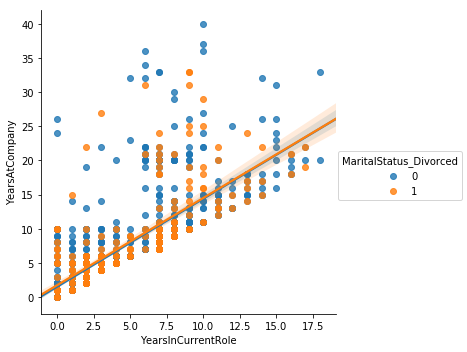

In [14]:
sns.lmplot(x='YearsInCurrentRole', y='YearsAtCompany', 
           data=df, hue='MaritalStatus_Divorced');

**Initial Insights**

In the graph above, it's interesting to see the cluster of divorces that occur during the first 10 years in the company. In the graph below, we will explore whether we can visually see if the number of years since a last promotion and the number of years an employee works with a particular manager against the marital status of "Divorce".

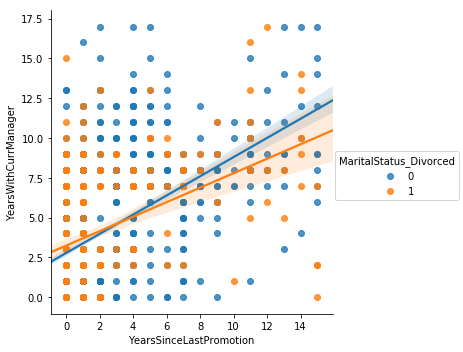

In [15]:
sns.lmplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', data=df, hue='MaritalStatus_Divorced')

**Lets change gears and look at ATTRITION**

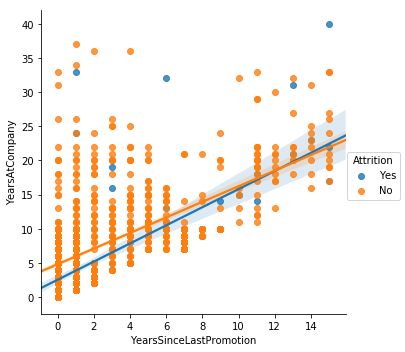

In [16]:
sns.lmplot(x='YearsSinceLastPromotion', y='YearsAtCompany', data=df, hue='Attrition')

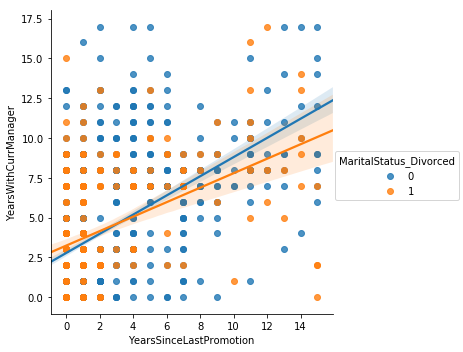

In [17]:
sns.lmplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', data=df, hue='MaritalStatus_Divorced')

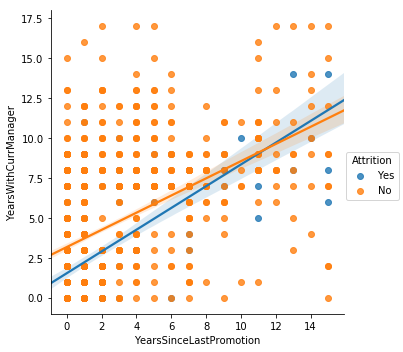

In [18]:
sns.lmplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', data=df, hue='Attrition')

## Machine Learning ## 

**Here we will be using different Machine Learning tools **

**Logistic Regression**

Logistic Regression is a good first tool because its simplicity can give us a good first baseline. Here we examine the correlation between Years at the Company, Years since last Promotion and the Marital Status of Divorce. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['YearsSinceLastPromotion', 'YearsAtCompany']]
y = df['MaritalStatus_Divorced']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88       380
          1       0.00      0.00      0.00       106

avg / total       0.61      0.78      0.69       486



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Using Support Vector Machine - SVM**

Here we will look at SVM to compare the results against Logistic Regression. 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[['YearsSinceLastPromotion', 'YearsAtCompany']]
y = df['MaritalStatus_Divorced']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
from sklearn.svm import SVC

In [30]:
svc_model = SVC()

In [31]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
predictions = svc_model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,predictions))

[[351   3]
 [ 86   1]]


In [35]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.99      0.89       354
          1       0.25      0.01      0.02        87

avg / total       0.69      0.80      0.72       441



## Using select_dtypes to select only numeric columns ##

In [36]:
ndf = df.select_dtypes(include=['int64','uint8'])

In [37]:
ndf.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       '18_Y', 'sex_Female', 'sex_Male', 'field_Human Resources',
       'field_Life Sciences', 'field_Marketing', 'field_Medical',
       'field_Other', 'field_Technical Degree',
       'role_Healthcare Representative', 'role_Human Resources',
       'rol

In [38]:
ndf.shape

(1470, 53)

## Using SVM on the new Numeric Data Frame ##

In [39]:
ndf.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       '18_Y', 'sex_Female', 'sex_Male', 'field_Human Resources',
       'field_Life Sciences', 'field_Marketing', 'field_Medical',
       'field_Other', 'field_Technical Degree',
       'role_Healthcare Representative', 'role_Human Resources',
       'rol

In [40]:
ndf['MaritalStatus_Divorced'].mean()

0.22244897959183674

In [41]:
X = ndf.drop(['MaritalStatus_Married', 'MaritalStatus_Divorced', 'MaritalStatus_Single'],axis=1)
y = ndf['MaritalStatus_Divorced']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [42]:
from sklearn.svm import SVC

In [43]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
predictions = svc_model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,predictions))

[[512   0]
 [150   0]]


In [47]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87       512
          1       0.00      0.00      0.00       150

avg / total       0.60      0.77      0.67       662



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## One Final try with Logistic Regression on the Numeric Columns ##

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = ndf.drop(['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single'],axis=1)
y = ndf['MaritalStatus_Divorced']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88       380
          1       0.57      0.22      0.32       106

avg / total       0.76      0.79      0.76       486



## The Fun Part ##

**Finding the features that most affect the Logistic Regression Score **

In [61]:
pd.DataFrame(logmodel.coef_,columns = X.columns).T.sort_values(by=0)

,0
BusinessTravel_Travel_Rarely,-0.228722
dept_Sales,-0.197088
sex_Female,-0.150345
role_Sales Representative,-0.125055
YearsSinceLastPromotion,-0.097613
YearsInCurrentRole,-0.060936
field_Life Sciences,-0.052917
role_Sales Executive,-0.040603
field_Medical,-0.039472
PercentSalaryHike,-0.034041


## Overall Conclusions ##

**Not the results I expected!**

I honestly thought that frequent business travel would have a higher impact on the Logistic Regression score on divorce. But it turns out that those that don't travel at all takes that cake! A little amusing, but perhaps not that surprising - Stock Option Level has the highest affect on the logistic regression score for divorce. 